In [1]:
import os
import sys

import pandas as pd
import numpy as np
import geopandas as gpd
import folium

import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/Repos/observatorio-ciudades/accesibilidad-urbana/aup/data.py:24: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(


## Read top city data

In [2]:
top_10 = pd.read_csv('../../../data/processed/nearshoring/top_10_cities_analysis.csv')

## Hexagon data by city

In [3]:
schema = 'hexgrid'
table = 'hexgrid_8_city_2020'
cities = list(top_10.city.unique())
query = f"SELECT * FROM {schema}.{table} WHERE \"city\" IN {str(tuple(cities))}"
hex_polygon = aup.gdf_from_query(query)

In [4]:
hex_polygon.head(2)

,hex_id_8,geometry,CVEGEO,NOMGEO,city,type
0,8848a2850bfffff,"POLYGON ((-100.51841 25.32212, -100.51367 25.3...",05004,Arteaga,Saltillo,rural
1,8848a049bdfffff,"POLYGON ((-100.70797 25.32476, -100.70324 25.3...",05004,Arteaga,Saltillo,rural


## Proximity data

In [5]:
schema = 'prox_analysis'
table = 'proximityanalysis_20_ageb_hex8'
hex_idx = list(hex_polygon.hex_id_8.unique())
query = f"SELECT * FROM {schema}.{table} WHERE \"hex_id\" IN {str(tuple(hex_idx))}"
hex_prox = aup.gdf_from_query(query)

In [6]:
hex_prox.city.unique()

array(['Tijuana', 'Saltillo', 'Juarez', 'Tula', 'Guadalajara', 'Toluca',
       'Monterrey', 'Puebla', 'Queretaro', 'SLP', 'ZMVM'], dtype=object)

In [7]:
print(hex_prox.shape)
hex_prox.head(2)

(10165, 34)


,hex_id,res,geometry,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,...,pobmas,pob_0a2,pob_3a5,pob_0a5,pob_0a14,pob_15a24,pob_25a59,p_60ymas,dens_pobha,city
0,8829a4d5e5fffff,8,"POLYGON ((-117.01143 32.47142, -117.01025 32.4...",62.555048,19.653761,18.509085,62.555048,59.297967,13.051804,59.297967,...,3427.5790,263.333250,316.86880,580.202050,1545.028160,1018.77264,3883.40264,371.33832,80.238231,Tijuana
1,8829a4c655fffff,8,"POLYGON ((-117.09653 32.51314, -117.09772 32.5...",38.528063,30.381515,29.651920,38.528063,54.769841,32.864468,54.769841,...,805.1311,56.876907,74.29901,131.175917,365.378832,268.98205,849.13581,136.26892,19.029442,Tijuana


In [8]:
hex_prox[['city','max_escuelas','max_servicios comunitarios',
             'max_comercio','max_entretenimiento']].groupby('city').mean()

,max_escuelas,max_servicios comunitarios,max_comercio,max_entretenimiento
city,,,,
Guadalajara,33.417476,45.096345,18.227339,80.263373
Juarez,38.906130,65.586237,24.407823,91.067795
Monterrey,37.397262,52.662793,28.147652,70.932809
Puebla,100.029518,130.919066,88.953176,187.282249
Queretaro,52.934587,75.781399,25.404514,111.573345
SLP,47.907699,51.900657,26.314757,86.979105
Saltillo,62.307193,57.612626,41.101507,79.733716
Tijuana,35.940672,54.721144,28.364854,76.658250
Toluca,27.377452,46.185168,17.068039,100.855652


## Read industry data

In [9]:
schema = 'public_interest'
table = 'nearshoring_denue_23_hex'
query = f"SELECT * FROM {schema}.{table} WHERE \"hex_id\" IN {str(tuple(hex_idx))}"
hex_near = aup.gdf_from_query(query)
print(hex_near.shape)
hex_near.head(2)

(1936, 9)


,hex_id,geometry,nearshoring_industry,per_ocu_num_near_sum,denue,per_ocu_num_tot_sum,nearshoring_industry_pct,nearshoring_workforce_pct,res
0,8829a4c2b5fffff,"POLYGON ((-116.95671 32.51277, -116.95215 32.5...",1,325,1,325,1.000000,1.000000,8
1,8829a4c2abfffff,"POLYGON ((-116.95317 32.49777, -116.94861 32.5...",1,3,13,232,0.076923,0.012931,8


<AxesSubplot: >

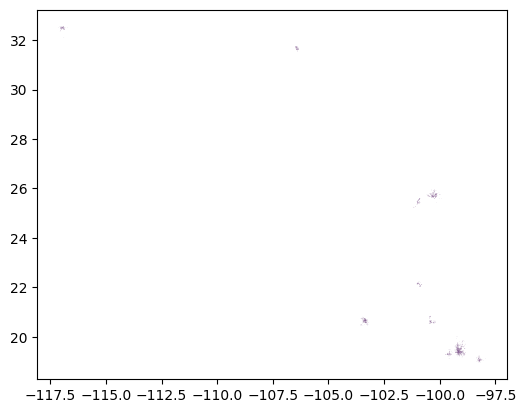

In [10]:
hex_near.plot('nearshoring_industry')

## Merge data

In [19]:
hex_near_prox = hex_prox.merge(hex_near.drop(columns=['res']), on='hex_id', how='outer')
print(hex_near_prox.shape)
hex_near_prox.head(2)

(10283, 41)


,hex_id,res,geometry_x,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,...,p_60ymas,dens_pobha,city,geometry_y,nearshoring_industry,per_ocu_num_near_sum,denue,per_ocu_num_tot_sum,nearshoring_industry_pct,nearshoring_workforce_pct
0,8829a4d5e5fffff,8.0,"POLYGON ((-117.01143 32.47142, -117.01025 32.4...",62.555048,19.653761,18.509085,62.555048,59.297967,13.051804,59.297967,...,371.33832,80.238231,Tijuana,None,NaN,NaN,NaN,NaN,NaN,NaN
1,8829a4c655fffff,8.0,"POLYGON ((-117.09653 32.51314, -117.09772 32.5...",38.528063,30.381515,29.651920,38.528063,54.769841,32.864468,54.769841,...,136.26892,19.029442,Tijuana,None,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
hex_near_prox.loc[hex_near_prox.geometry_x.isnull(),'geometry_x'] = hex_near_prox['geometry_y']
hex_near_prox = hex_near_prox.rename(columns={'geometry_x':'geometry'})
hex_near_prox = hex_near_prox.drop(columns=['geometry_y'])
hex_near_prox.tail(4)

,hex_id,res,geometry,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,...,pob_25a59,p_60ymas,dens_pobha,city,nearshoring_industry,per_ocu_num_near_sum,denue,per_ocu_num_tot_sum,nearshoring_industry_pct,nearshoring_workforce_pct
10279,88498352d5fffff,NaN,"POLYGON ((-100.42721 20.81715, -100.42264 20.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,325.0,4.0,865.0,0.250000,0.375723
10280,88499da9a5fffff,NaN,"POLYGON ((-100.90162 22.22169, -100.89700 22.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,325.0,4.0,615.0,0.250000,0.528455
10281,88499d0611fffff,NaN,"POLYGON ((-100.84928 22.17869, -100.84467 22.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,175.0,2.0,250.0,0.500000,0.700000
10282,8849943731fffff,NaN,"POLYGON ((-98.22789 19.16221, -98.22337 19.165...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,3.0,24.0,862.0,0.041667,0.003480


In [21]:
hex_polygon = hex_polygon.reset_index()
hex_polygon = hex_polygon.rename(columns={'hex_id':'hex_id_8'})

In [22]:
hex_polygon

,level_0,index,hex_id_8,geometry,CVEGEO,NOMGEO,city,type
0,0,0,8848a2850bfffff,"POLYGON ((-100.51841 25.32212, -100.51367 25.3...",05004,Arteaga,Saltillo,rural
1,1,1,8848a049bdfffff,"POLYGON ((-100.70797 25.32476, -100.70324 25.3...",05004,Arteaga,Saltillo,rural
2,2,2,8848a2ba45fffff,"POLYGON ((-100.58014 25.40432, -100.57540 25.4...",05004,Arteaga,Saltillo,rural
3,3,3,8848a28063fffff,"POLYGON ((-100.41460 25.21135, -100.40987 25.2...",05004,Arteaga,Saltillo,rural
4,4,4,8848a2bb53fffff,"POLYGON ((-100.54742 25.43013, -100.54268 25.4...",05004,Arteaga,Saltillo,rural
...,...,...,...,...,...,...,...,...
49954,49954,49954,884995b21dfffff,"POLYGON ((-99.34666 19.33493, -99.34214 19.337...",15037,Huixquilucan,ZMVM,urban
49955,49955,49955,8849958a9bfffff,"POLYGON ((-98.95914 19.26351, -98.95463 19.266...",15122,Valle de Chalco Solidaridad,ZMVM,urban
49956,49956,49956,884995a91bfffff,"POLYGON ((-99.08391 19.63437, -99.07938 19.637...",15020,Coacalco de Berriozábal,ZMVM,urban
49957,49957,49957,8849958919fffff,"POLYGON ((-98.82258 19.26596, -98.81806 19.268...",15025,Chalco,ZMVM,urban


In [23]:
hex_near_prox = hex_near_prox.merge(hex_polygon[['hex_id_8','city']], left_on='hex_id',
                                   right_on='hex_id_8', how='left')
hex_near_prox.loc[hex_near_prox.city_y.isnull(),'city_y'] =  hex_near_prox['city_x']
hex_near_prox = hex_near_prox.drop(columns=['city_x'])
hex_near_prox = hex_near_prox.rename(columns={'city_y':'city'})

In [24]:
hex_near_prox.columns

Index(['hex_id', 'res', 'geometry', 'max_escuelas', 'max_preescolar',
       'max_primaria', 'max_secundaria', 'max_servicios comunitarios',
       'max_salud', 'max_guarderías', 'max_asistencia social', 'max_comercio',
       'max_alimentos', 'max_personal', 'max_farmacias', 'max_hogar',
       'max_complementarios', 'max_entretenimiento', 'max_social',
       'max_actividad física', 'max_cultural', 'max_idx_15_min', 'pobtot',
       'pobfem', 'pobmas', 'pob_0a2', 'pob_3a5', 'pob_0a5', 'pob_0a14',
       'pob_15a24', 'pob_25a59', 'p_60ymas', 'dens_pobha',
       'nearshoring_industry', 'per_ocu_num_near_sum', 'denue',
       'per_ocu_num_tot_sum', 'nearshoring_industry_pct',
       'nearshoring_workforce_pct', 'hex_id_8', 'city'],
      dtype='object')

## Fill time gaps

Fill time gaps through IDW interpolation

In [26]:
hex_near_prox.city.unique()

array(['Tijuana', 'Saltillo', 'Juarez', 'ZMVM', 'Guadalajara', 'Toluca',
       'Monterrey', 'Puebla', 'Queretaro', 'SLP', 'CDMX'], dtype=object)

In [27]:
hex_near_prox.city.isnull().sum()

0

Change cooridnate system to meters

In [28]:
hex_near_prox = gpd.GeoDataFrame(data=hex_near_prox, geometry=hex_near_prox['geometry'])
hex_near_prox = hex_near_prox.to_crs("EPSG:6372")

First, interate over city and then over category

In [29]:
category_cols = ['max_escuelas','max_servicios comunitarios','max_comercio','max_entretenimiento']

test_gdf = hex_near_prox.copy()

for city in test_gdf.city.unique():
    
    city_gdf = test_gdf.loc[test_gdf.city==city].copy()
    
    for column_analysis in category_cols:
        
        observed_gdf = gpd.GeoDataFrame(data = city_gdf.loc[city_gdf[column_analysis].notnull(),column_analysis],
                 geometry=city_gdf.loc[city_gdf[column_analysis].notnull()].centroid)
        missing_gdf = gpd.GeoDataFrame(geometry=city_gdf.loc[city_gdf[column_analysis].isnull()].centroid)
        
        if len(missing_gdf) == 0:
            continue
        
        missing_gdf[column_analysis] = aup.interpolate_at_points(np.array(observed_gdf.geometry.x), np.array(observed_gdf.geometry.y), 
                         np.array(observed_gdf[column_analysis]), np.array(missing_gdf.geometry.x),
                         np.array(missing_gdf.geometry.y), power=4)
        # update original gdf
        test_gdf.update(missing_gdf[column_analysis])

In [30]:
test_gdf[['max_comercio']].tail(5)

,max_comercio
10334,18.924832
10335,17.248543
10336,34.558551
10337,28.577017
10338,15.648697


In [31]:
test_gdf.max_comercio.isnull().sum()

0

## Time analysis

Weighted average

In [32]:
def weighted_average(df, weight_column, value_column):
	"""
	Weighted average function that takes a DataFrame, weight column name and value column name as inputs
	Arguments:
		df (pandas.DataFrame): DataFrame containing the data to be averaged
		weight_column (str): Column name with weight data
		value_column (str): Column name with value data
	Returns:
		weighted_average (float): Weighted average of the value column
	"""
	weighted_average = (df[weight_column] * df[value_column]).sum() / df[weight_column].sum()
	return weighted_average

Nearshoring industry

In [33]:
category_cols = ['max_escuelas','max_servicios comunitarios','max_comercio','max_entretenimiento']
df_res = pd.DataFrame()
row_n = 0

for city in test_gdf.city.unique():
    for column_analysis in category_cols:
        
        res = weighted_average(test_gdf.loc[(test_gdf.city==city)],'per_ocu_num_near_sum',column_analysis)
        df_res.loc[row_n,'near_'+column_analysis] = res
    df_res.loc[row_n,'city'] = city
    row_n += 1

Population distance

In [34]:
for city in test_gdf.city.unique():
    for column_analysis in category_cols:
        
        res = weighted_average(test_gdf.loc[(test_gdf.city==city)],'pobtot',column_analysis)
        df_res.loc[df_res.city==city,'pob_'+column_analysis] = res
    df_res.loc[df_res.city==city,'city'] = city
    row_n += 1

In [36]:
df_res

,near_max_escuelas,near_max_servicios comunitarios,near_max_comercio,near_max_entretenimiento,city,pob_max_escuelas,pob_max_servicios comunitarios,pob_max_comercio,pob_max_entretenimiento
0,33.577357,36.881721,19.196590,55.495250,Tijuana,29.257404,49.532915,20.421882,71.947240
1,70.264282,66.703696,53.526256,72.072926,Saltillo,30.458652,32.789820,14.804279,50.838635
2,33.214789,35.149169,14.753761,45.045645,Juarez,31.148373,46.752402,14.986182,66.710536
3,17.855569,22.578194,10.280571,36.963964,ZMVM,15.015039,26.726115,7.075897,49.695882
4,28.312647,36.208723,13.385828,57.301544,Guadalajara,22.871451,29.042927,9.801992,59.019163
5,26.798694,27.945617,16.707108,44.455323,Toluca,20.362222,30.791949,10.668780,69.774685
6,37.654620,43.548080,26.757689,68.134006,Monterrey,23.989440,36.171095,15.670589,55.675640
7,34.037697,34.663011,19.341084,72.226531,Puebla,94.568963,110.482040,82.930997,145.136335
8,39.836657,89.240500,24.353680,124.546910,Queretaro,41.495312,46.461369,13.561542,68.997269
9,94.483317,88.122802,49.650350,160.352226,SLP,22.560606,27.352201,10.905103,51.959974


## New urbanizations

In [37]:
growth_gdf = gpd.read_file('../../../data/processed/nearshoring/urban_growth.geojson')

In [38]:
print(growth_gdf.shape)
growth_gdf.head(2)

(10235, 11)


,hex_id_8,CVEGEO,NOMGEO,city,type,20_pobtot,20_vivtot,10_pobtot,10_vivtot,nueva_urbanizacion,geometry
0,884995b889fffff,09002,Azcapotzalco,CDMX,urban,9150.0,3004.0,11473.0,3515.0,0,"POLYGON ((-99.18300 19.49493, -99.17848 19.497..."
1,884995b8d1fffff,09002,Azcapotzalco,CDMX,urban,12761.0,4018.0,12034.0,3661.0,0,"POLYGON ((-99.20183 19.49350, -99.19730 19.496..."


In [39]:
new_growth_gdf = growth_gdf.loc[growth_gdf.nueva_urbanizacion==1].copy()
print(new_growth_gdf.shape)
new_growth_gdf.head(2)

(1240, 11)


,hex_id_8,CVEGEO,NOMGEO,city,type,20_pobtot,20_vivtot,10_pobtot,10_vivtot,nueva_urbanizacion,geometry
126,884995b04bfffff,09004,Cuajimalpa de Morelos,CDMX,rural,395.0,106.0,0.0,0.0,1,"POLYGON ((-99.31540 19.36063, -99.31088 19.363..."
467,88499582e9fffff,09009,Milpa Alta,CDMX,urban,43.0,26.0,0.0,0.0,1,"POLYGON ((-99.07476 19.16175, -99.07025 19.164..."


In [40]:
new_growth_gdf = new_growth_gdf.merge(hex_prox, left_on='hex_id_8',
                    right_on='hex_id', how='left')
new_growth_gdf = new_growth_gdf.rename(columns={'city_x':'city'})
new_growth_gdf = new_growth_gdf.drop(columns=['city_y'])

In [41]:
for city in new_growth_gdf.city.unique():
    for column_analysis in category_cols:
        res = new_growth_gdf.loc[new_growth_gdf.city==city,column_analysis].mean()
        df_res.loc[df_res.city==city,'new_'+column_analysis] = res

In [42]:
df_res

,near_max_escuelas,near_max_servicios comunitarios,near_max_comercio,near_max_entretenimiento,city,pob_max_escuelas,pob_max_servicios comunitarios,pob_max_comercio,pob_max_entretenimiento,new_max_escuelas,new_max_servicios comunitarios,new_max_comercio,new_max_entretenimiento
0,33.577357,36.881721,19.196590,55.495250,Tijuana,29.257404,49.532915,20.421882,71.947240,64.979111,104.276028,64.528527,135.497877
1,70.264282,66.703696,53.526256,72.072926,Saltillo,30.458652,32.789820,14.804279,50.838635,184.021183,168.735032,150.710686,209.528001
2,33.214789,35.149169,14.753761,45.045645,Juarez,31.148373,46.752402,14.986182,66.710536,55.888214,130.912019,51.066963,186.198969
3,17.855569,22.578194,10.280571,36.963964,ZMVM,15.015039,26.726115,7.075897,49.695882,47.247922,69.250616,38.326486,105.686047
4,28.312647,36.208723,13.385828,57.301544,Guadalajara,22.871451,29.042927,9.801992,59.019163,63.162099,85.264001,44.768652,134.291501
5,26.798694,27.945617,16.707108,44.455323,Toluca,20.362222,30.791949,10.668780,69.774685,45.334469,62.398364,35.464262,111.572558
6,37.654620,43.548080,26.757689,68.134006,Monterrey,23.989440,36.171095,15.670589,55.675640,56.946277,86.621534,46.048587,109.044456
7,34.037697,34.663011,19.341084,72.226531,Puebla,94.568963,110.482040,82.930997,145.136335,43.227146,91.839632,33.189891,153.706247
8,39.836657,89.240500,24.353680,124.546910,Queretaro,41.495312,46.461369,13.561542,68.997269,76.977186,98.340818,46.139656,134.998682
9,94.483317,88.122802,49.650350,160.352226,SLP,22.560606,27.352201,10.905103,51.959974,86.466522,90.617585,52.620249,146.534472


## Save data

In [43]:
df_res.to_csv('../../../data/processed/nearshoring/proximity_comparison.csv')